# Use Case

In [1]:
# 1. Correlation between property price and other parameters to figure out which parameter has the highest correlation score

# 2. Property market trend during Mar 2016 to Dec 2017
# 2.1 Overview of the market trend
# 2.2 Market trend by type
# 2.3 Market price distribution
# 2.4 Top 10 sold suburbs (Total and by type) 

# 3. Select 3 suburbs to analyse (all of them are in the top 10 suburbs)
# 3.1 No.1 sold suburbs in both total and house type
# 3.2 Suburb with half house and half other types
# 3.3 Suburb with more unit sold

# 4. Forecast

# Import Libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
import json
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Processing

In [3]:
price = pd.read_csv('C:\\Users\\lzh-a\\Desktop\\DA\\melb_data.csv')
pd.set_option('display.max_columns', None)
price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
#Convert Date type into datetime

In [6]:
price['Date'] = pd.to_datetime(price['Date'])

In [7]:
#Check the number of null value in the columns

In [8]:
price.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
#Delete the rows which the number of Rooms is less than the number of Bedroom2

In [10]:
price.drop(price.loc[price['Rooms'] < price['Bedroom2']].index, inplace = True)

In [11]:
#Delete the rows which the number of Bedroom2 is 0

In [12]:
price.drop(price.loc[price['Bedroom2'] == 0].index, inplace = True)

In [13]:
#Delete the rows which the number of Bathroom is 0

In [14]:
price.drop(price.loc[price['Bathroom'] == 0].index, inplace = True)

# Data Visualization

## 1. Overview

### 1.1 Correlation between price and other paramaters

<AxesSubplot:>

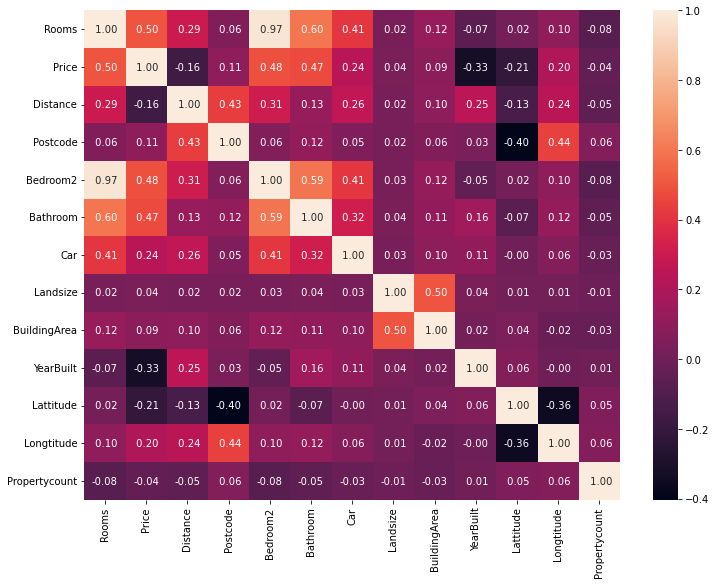

In [15]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(price.corr(), annot = True, fmt = ' .2f')

In [16]:
# In terms of the price, the highest correlation coefficient is 0.5, which is the correlation between rooms and price.
# Hence, it seems that there is no strong relationship between the price and other parameters.

### 1.2 Suburb distribution 

In [17]:
location = geopandas.read_file('C:\\Users\\lzh-a\\Desktop\\SourceCode\\suburb-10-vic.geojson')
location.head(5)

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3..."
2,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.3,6672,2011-08-31,None,VIC2862,2012-04-27,None,WOORNDOO,None,None,G,None,2,"POLYGON ((142.92288 -37.97886, 142.85448 -37.9..."
3,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.4,6673,2011-08-31,None,VIC734,2017-08-09,None,DEPTFORD,None,None,G,None,2,"POLYGON ((147.82336 -37.66001, 147.72499 -37.6..."
4,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.5,6674,2011-08-31,None,VIC2900,2012-04-27,None,YANAC,None,None,G,None,2,"POLYGON ((141.27978 -35.99859, 141.28480 -35.9..."


In [18]:
location.rename(columns = {'vic_loca_2':'Suburb'}, inplace = True)

In [19]:
price_count = price.groupby(['Suburb'])['Address'].count().reset_index(name = 'Count')
price_count['Suburb'] = price_count['Suburb'].str.upper()

In [20]:
loc_join = location.merge(price_count, on = 'Suburb', how = 'left')

(-37.95, -37.65)

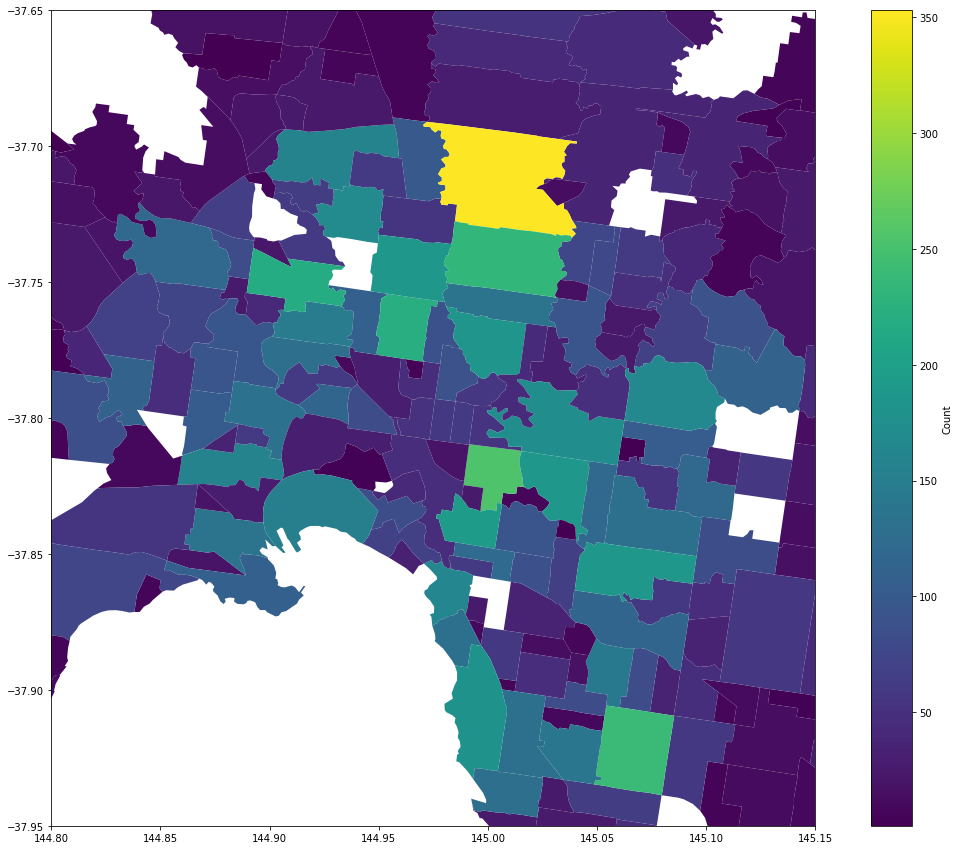

In [21]:
fig_leg, ax_leg = plt.subplots(figsize = (20, 15))
loc_join.plot(column = 'Count', ax = ax_leg, legend = True, legend_kwds = {'label':'Count', 'orientation':'vertical'})
plt.xlim(144.8, 145.15)
plt.ylim(-37.95, -37.65)

In [22]:
# The suburbs with large number of listing properties are around the Melbourne city.

### 1.3 Median price trend

In [23]:
price_median = price.groupby(['Date'])['Price'].agg('median').reset_index(name = 'Median')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

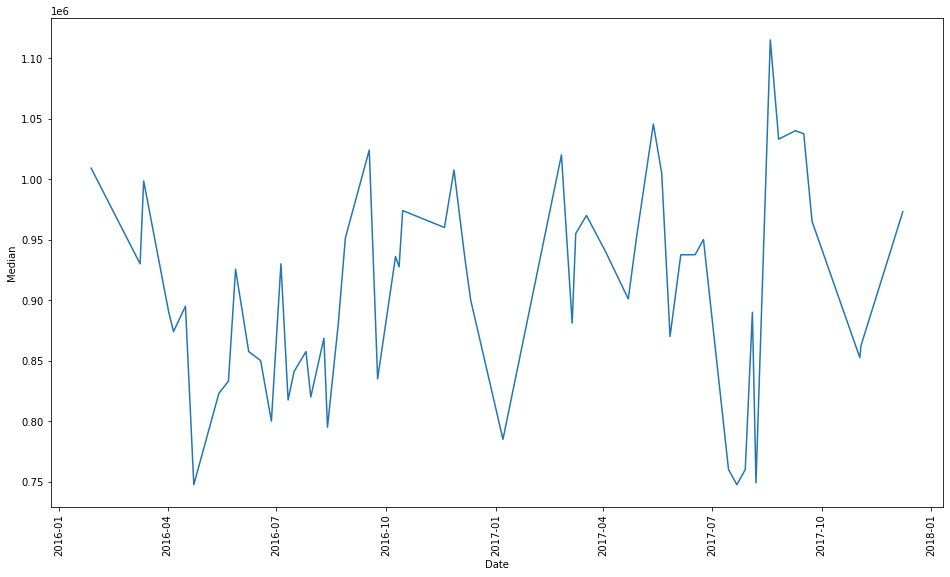

In [24]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_median['Date'], y = price_median['Median'])
plt.xticks(rotation = 90)

In [25]:
# The mediam price of all the properties fluctuated during 2016 to 2017 
# The bottom of the market appeared in around May 2016 and July to August 2017
# The peak of the market appeared in around August to September 2017

In [26]:
price_median_ty = price.groupby(['Date','Type'])['Price'].agg('median').reset_index(name = 'Median_ty')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

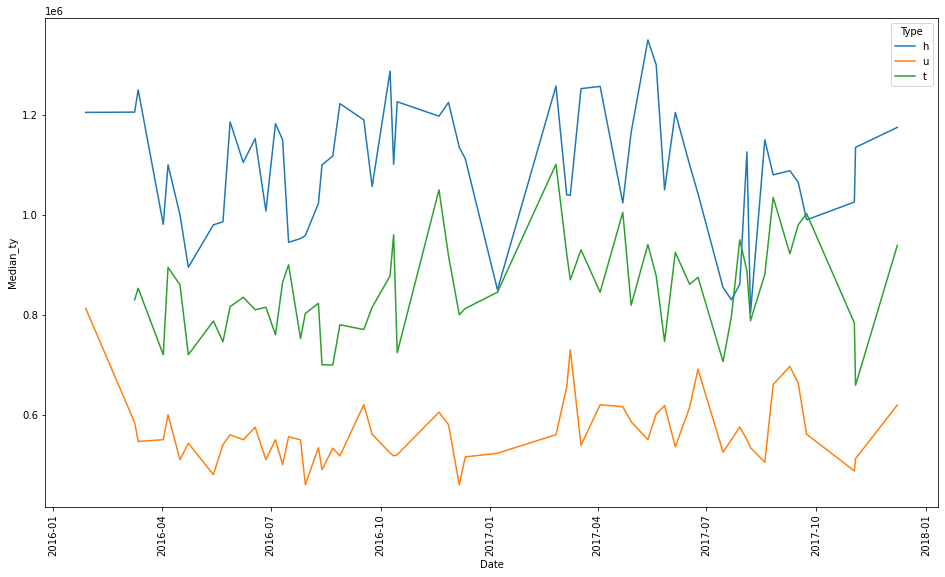

In [27]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_median_ty['Date'], y = price_median_ty['Median_ty'], hue = price_median_ty['Type'])
plt.xticks(rotation = 90)

In [28]:
# The market trend of all three types of properties followed similar trend.
# The house price is the highest while the unit price is the lowest.

### 1.4 Median price distribution

In [29]:
price_med = price.groupby(['Suburb'])['Price'].agg('median').sort_values(ascending = False).reset_index(name = 'Median')

<AxesSubplot:xlabel='Median', ylabel='Count'>

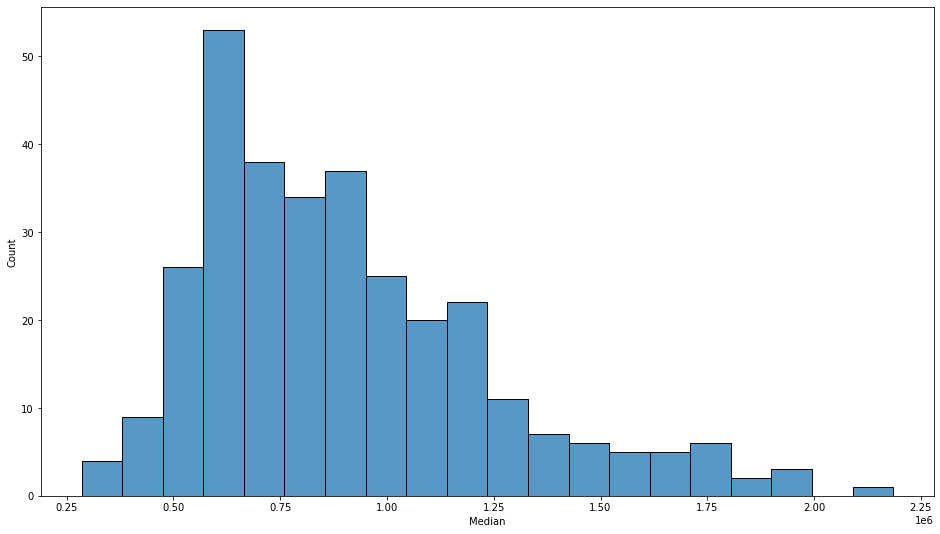

In [30]:
fig, axs = plt.subplots(figsize = (16,9))
sns.histplot(price_med['Median'], bins = 20)

In [31]:
# The majority of the median price fell into the range of 0.5 million to 1 million

In [32]:
price_med_ty = price.groupby(['Suburb','Type'])['Price'].agg('median').reset_index(name = 'Median_ty')
price_med_ty

,Suburb,Type,Median_ty
0,Abbotsford,h,1185000.0
1,Abbotsford,t,1212500.0
2,Abbotsford,u,502500.0
3,Aberfeldie,h,1365000.0
4,Aberfeldie,t,1117500.0
...,...,...,...
684,Yallambie,h,793000.0
685,Yarra Glen,h,620000.0
686,Yarraville,h,995000.0
687,Yarraville,t,800000.0


<AxesSubplot:xlabel='Median_ty', ylabel='Count'>

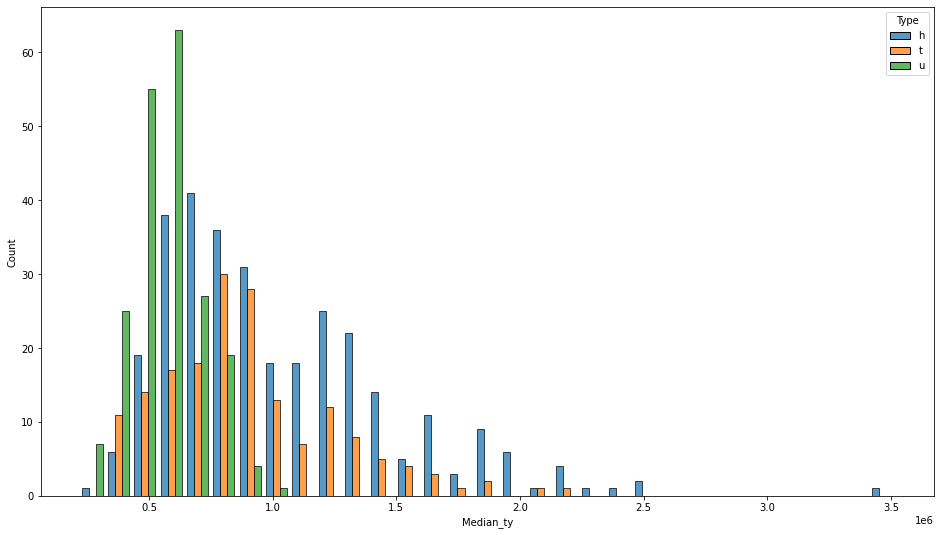

In [33]:
fig, axs = plt.subplots(figsize = (16,9))
sns.histplot(price_med_ty, x = price_med_ty['Median_ty'], hue = price_med_ty['Type'], multiple = "dodge", shrink = .8)

In [34]:
# The majority unit price was around 0.5M, the majority house price was from 0.65M to 0.85M, and the townhouse was 0.85M to 0.95M
# As the unit has the largest number of low price, which dragged the whole market price around 0.65M. 
# It is in line with the conclusion of the whole market distribution

### 1.5 Top 10 sold suburbs 

In [35]:
price_sub = price.groupby(['Suburb', 'Type'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')

In [36]:
price_subTol = price.groupby(['Suburb'])['Address'].count().sort_values(ascending = False).reset_index(name = 'Count')

<AxesSubplot:xlabel='Suburb', ylabel='Count'>

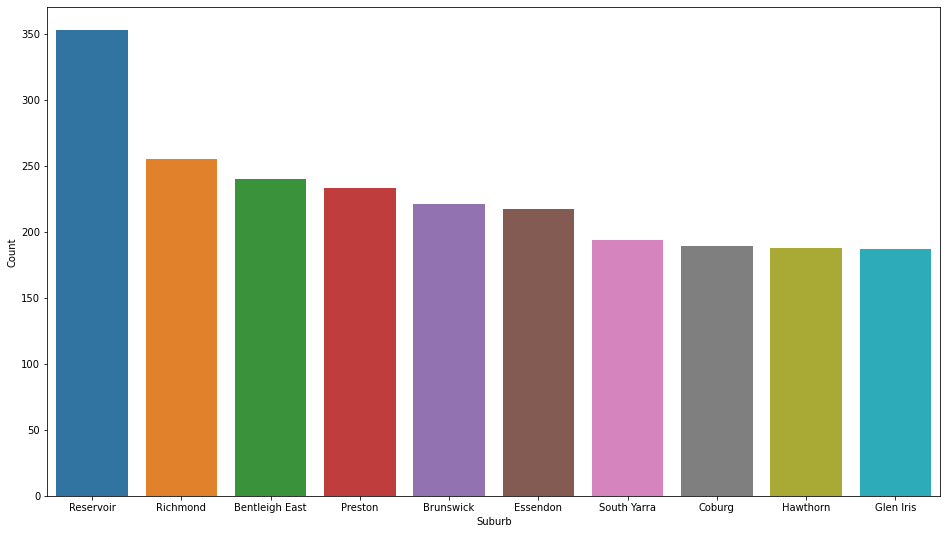

In [37]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_subTol['Suburb'][:10], y = price_subTol['Count'])

<AxesSubplot:xlabel='Suburb', ylabel='Count'>

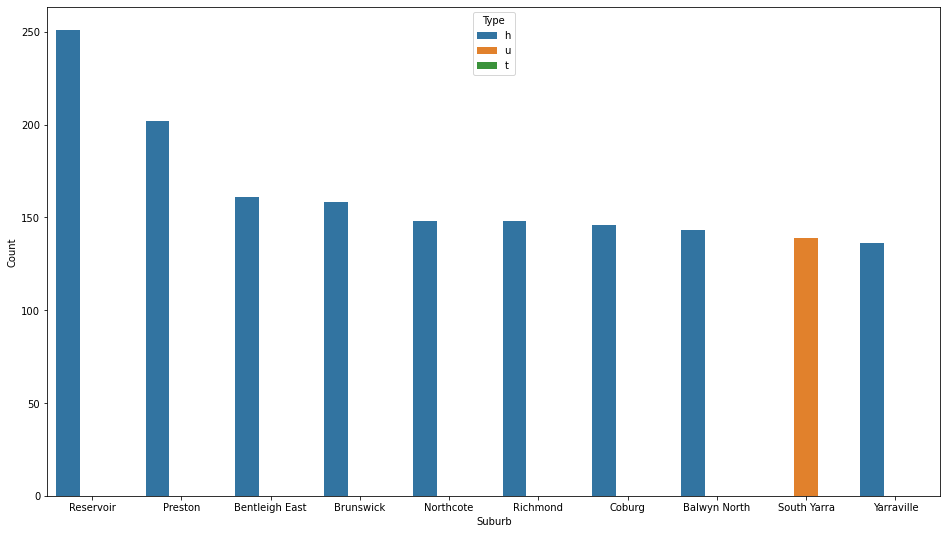

In [38]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_sub['Suburb'][:10], y = price_sub['Count'], hue = price_sub['Type'])

In [39]:
price_Res = price.set_index('Suburb').loc['Reservoir'].reset_index()
price_Ric = price.set_index('Suburb').loc['Richmond'].reset_index()
price_SY = price.set_index('Suburb').loc['South Yarra'].reset_index()

In [40]:
price_Res.drop(columns = ['Postcode', 'Propertycount'], inplace = True)
price_Ric.drop(columns = ['Postcode', 'Propertycount'], inplace = True)
price_SY.drop(columns = ['Postcode', 'Propertycount'], inplace = True)

In [41]:
# The reasons of selecting these three suburb: 
# 1. Reservoir has the largest number of sold properties in both total and house market
# 2. There are about 250 properties were sold in Richmond, and 150 of them are house. It means there are 100 properties are
# other types
# 3. South Yarra is the only suburb in the Top 10 suburb that the sold properties were not houses

## 2. Reservoir 

In [42]:
price_Res.isna().sum()/(price_Res.isna().sum() + price_Res.count())*100

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
BuildingArea    51.558074
YearBuilt       43.626062
CouncilArea     10.198300
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
dtype: float64

<AxesSubplot:>

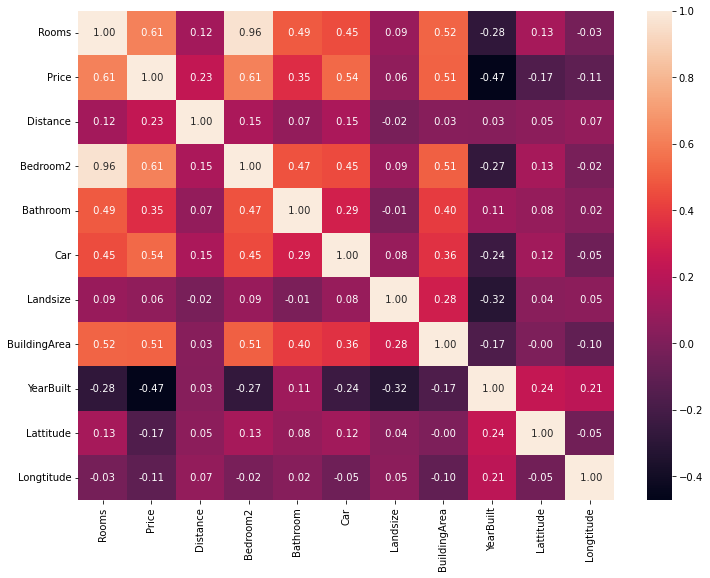

In [43]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(price_Res.corr(), annot = True, fmt = ' .2f')

In [44]:
# In terms of the price, the number of Rooms and Bedroom2 have the highest correlation coefficient, following by Carspace and Building Area.
# It means the more numbers of Rooms and Bedroom2 are, the higher the price will be, as they are positive related.
# However, the correlation coefficient between price and building area may not accurate, as there are 52% null value in building area column.

### 2.1 Median price trend

In [45]:
price_Res_median = price_Res.groupby(['Date'])['Price'].agg('median').reset_index(name = 'ResMedian')

(array([16892., 16983., 17075., 17167., 17257., 17348., 17440., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

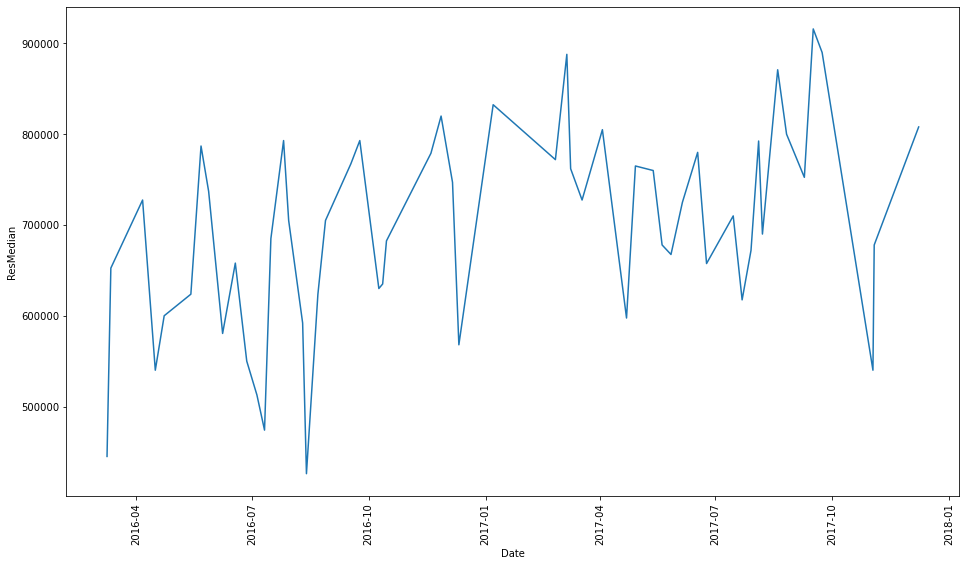

In [46]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_Res_median['Date'], y = price_Res_median['ResMedian'])
plt.xticks(rotation = 90)

In [47]:
price_Resm = pd.merge(price_median, price_Res_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

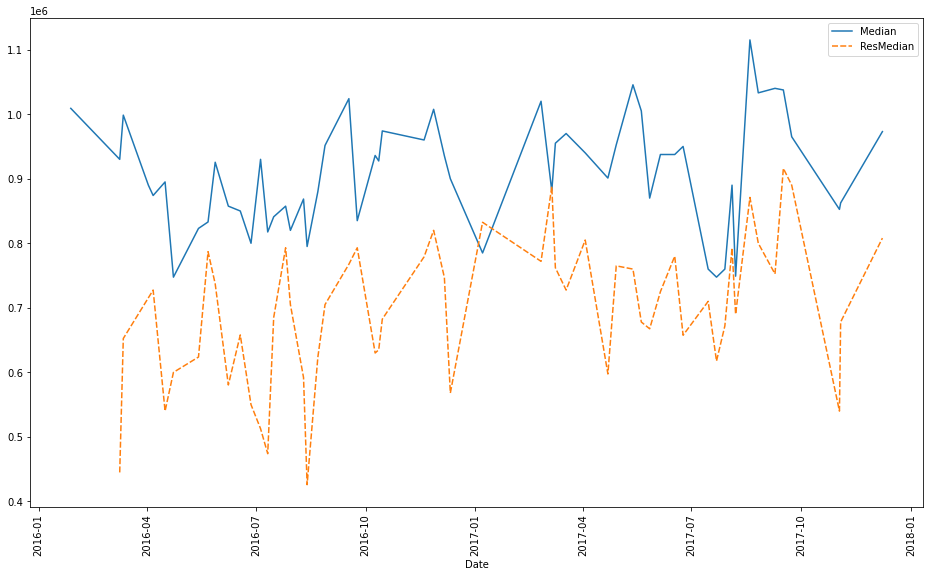

In [48]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_Resm)
plt.xticks(rotation = 90)

In [49]:
# The median price of Reservior was always lower than the whole market
# As Reservior's median price was lower, it might be the reason that the suburb has the largest listing properties, as it is easy to afford.

### 2.2 Number of property sold during the period

In [50]:
price_Res_count = price_Res.groupby(['Date'])['Address'].count().reset_index(name = 'Count')
price_Res_count['Date'] = price_Res_count['Date'].dt.to_period('M')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2016-03'),
  Text(1, 0, '2016-04'),
  Text(2, 0, '2016-05'),
  Text(3, 0, '2016-06'),
  Text(4, 0, '2016-07'),
  Text(5, 0, '2016-08'),
  Text(6, 0, '2016-09'),
  Text(7, 0, '2016-10'),
  Text(8, 0, '2016-11'),
  Text(9, 0, '2016-12'),
  Text(10, 0, '2017-01'),
  Text(11, 0, '2017-02'),
  Text(12, 0, '2017-03'),
  Text(13, 0, '2017-04'),
  Text(14, 0, '2017-05'),
  Text(15, 0, '2017-06'),
  Text(16, 0, '2017-07'),
  Text(17, 0, '2017-08'),
  Text(18, 0, '2017-09'),
  Text(19, 0, '2017-11'),
  Text(20, 0, '2017-12')])

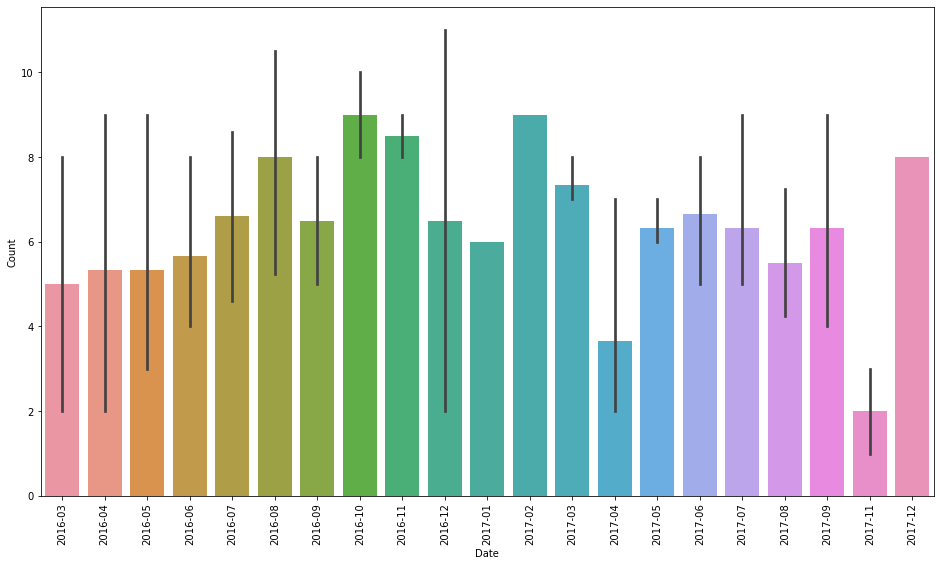

In [51]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_count['Date'], y = price_Res_count['Count'])
plt.xticks(rotation = 90)

In [52]:
# There is a peak of sold properties from August to November every year in this suburb.

### 2.3 Seller agent analysis

In [53]:
price_Res_sel = price_Res.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Barry'),
  Text(1, 0, 'Raine'),
  Text(2, 0, 'Nelson'),
  Text(3, 0, 'RW'),
  Text(4, 0, 'Ray'),
  Text(5, 0, 'McGrath'),
  Text(6, 0, 'hockingstuart'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'Love'),
  Text(9, 0, 'Stockdale'),
  Text(10, 0, 'Harrington'),
  Text(11, 0, 'HAR'),
  Text(12, 0, 'Fletchers'),
  Text(13, 0, 'Woodards'),
  Text(14, 0, 'Darren'),
  Text(15, 0, 'Purplebricks'),
  Text(16, 0, 'Alexkarbon'),
  Text(17, 0, 'Brad')])

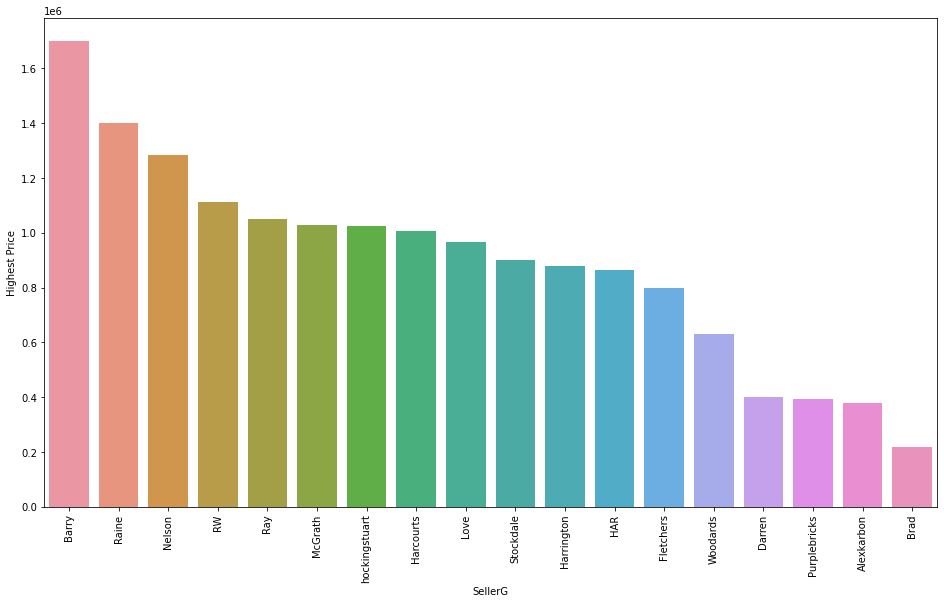

In [54]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_sel['SellerG'], y = price_Res_sel['Highest Price'])
plt.xticks(rotation = 90)

In [55]:
price_Res_sell = price_Res.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Brad'),
  Text(1, 0, 'Stockdale'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Love'),
  Text(4, 0, 'Barry'),
  Text(5, 0, 'Ray'),
  Text(6, 0, 'Nelson'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'Alexkarbon'),
  Text(9, 0, 'Purplebricks'),
  Text(10, 0, 'Darren'),
  Text(11, 0, 'RW'),
  Text(12, 0, 'McGrath'),
  Text(13, 0, 'Woodards'),
  Text(14, 0, 'Raine'),
  Text(15, 0, 'Fletchers'),
  Text(16, 0, 'HAR'),
  Text(17, 0, 'Harrington')])

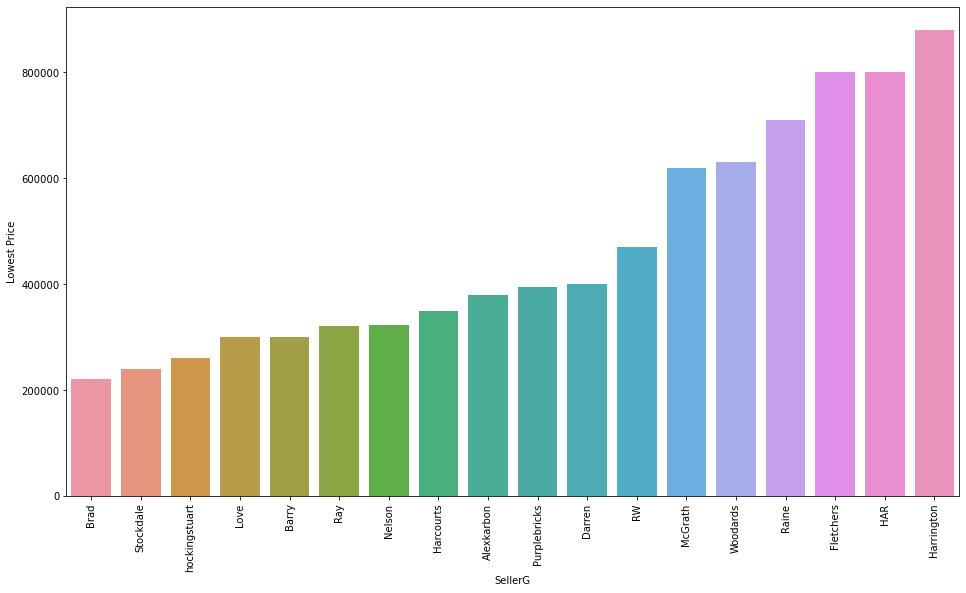

In [56]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Res_sell['SellerG'], y = price_Res_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [57]:
price_Res_selcount = price_Res.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Barry'),
  Text(1, 0, 'Nelson'),
  Text(2, 0, 'Ray'),
  Text(3, 0, 'Love'),
  Text(4, 0, 'hockingstuart'),
  Text(5, 0, 'Stockdale'),
  Text(6, 0, 'RW'),
  Text(7, 0, 'Harcourts'),
  Text(8, 0, 'McGrath'),
  Text(9, 0, 'HAR'),
  Text(10, 0, 'Raine'),
  Text(11, 0, 'Harrington'),
  Text(12, 0, 'Purplebricks'),
  Text(13, 0, 'Fletchers'),
  Text(14, 0, 'Darren'),
  Text(15, 0, 'Brad'),
  Text(16, 0, 'Woodards'),
  Text(17, 0, 'Alexkarbon')])

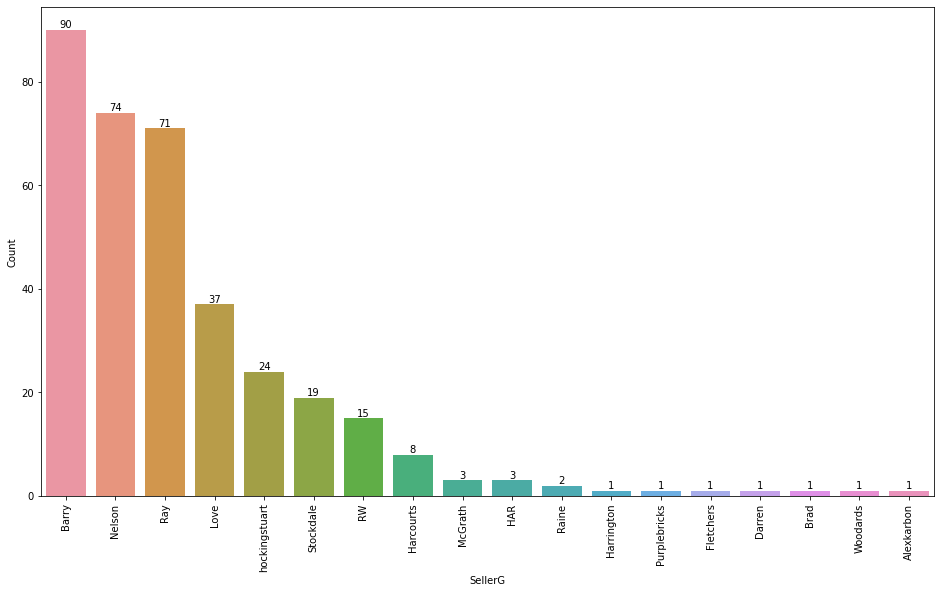

In [58]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_Res_selcount['SellerG'], y = price_Res_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

In [59]:
# It is meaningless to analyse the agent which sold 1 property during the period.
# Barry is the most client-favourable agent in this suburb with highest selling price and largest number of properties sold.

## 3. Richmond

In [60]:
price_Ric.isna().sum()/(price_Ric.isna().sum() + price_Ric.count())*100

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              0.392157
Landsize         0.000000
BuildingArea    42.352941
YearBuilt       33.725490
CouncilArea      3.529412
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
dtype: float64

<AxesSubplot:>

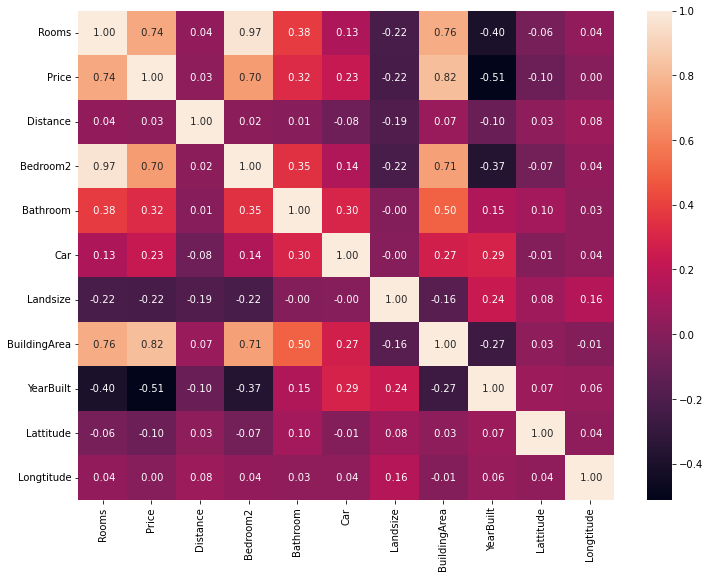

In [61]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(price_Ric.corr(), annot = True, fmt = ' .2f')

In [62]:
# In terms of the price, the buiding area has the highest correlation coefficient, following by Rooms and Bedroom2.
# It means the larger building area is, the higher the price will be, as they are positive related.
# However, the correlation coefficient between price and building area may not accurate, as there are 42% null value in building area column.

### 3.1 Median price trend

In [63]:
price_Ric_median = price_Ric.groupby(['Date'])['Price'].agg('median').reset_index(name = 'RicMedian')

(array([16861., 16922., 16983., 17045., 17106., 17167., 17226., 17287.,
        17348., 17410., 17471.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

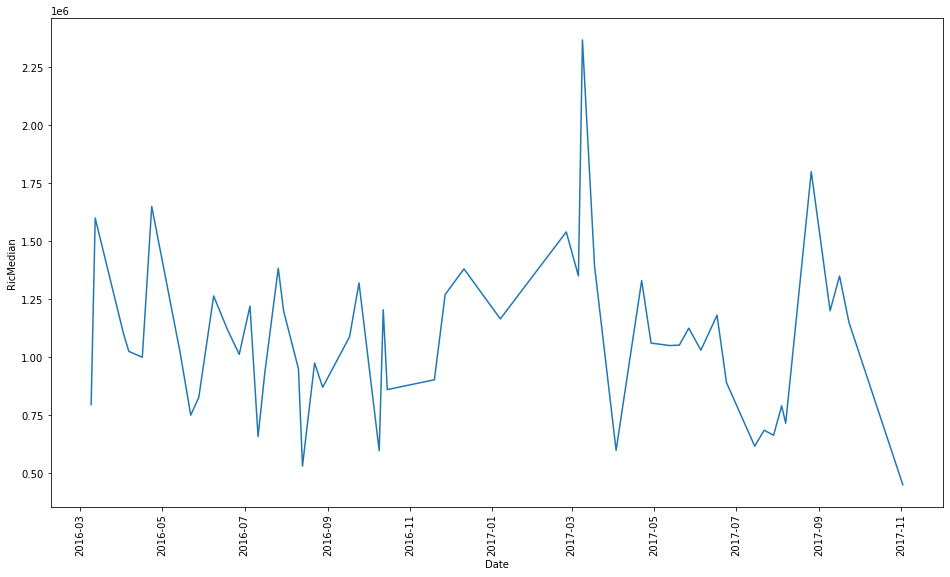

In [64]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_Ric_median['Date'], y = price_Ric_median['RicMedian'])
plt.xticks(rotation = 90)

In [65]:
price_Ricm = pd.merge(price_median, price_Ric_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

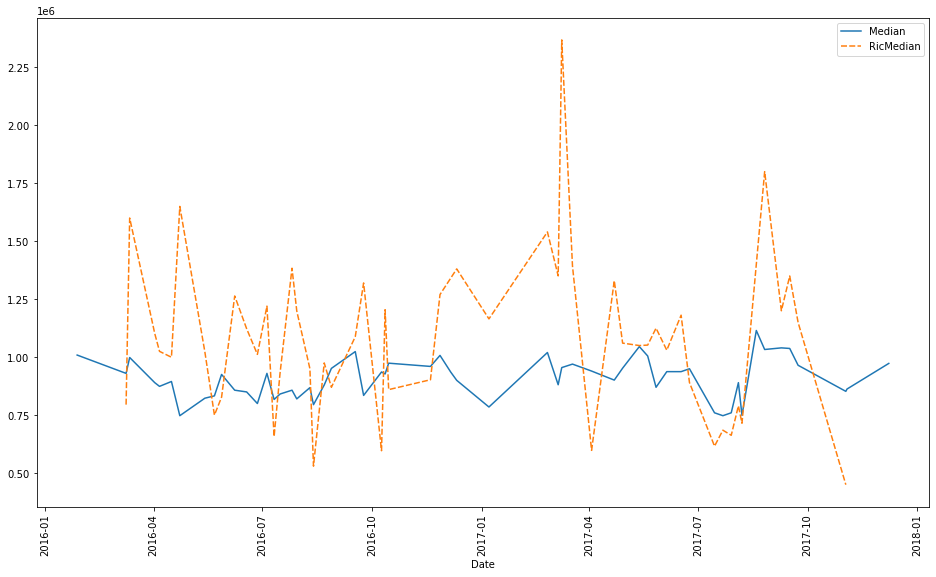

In [66]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_Ricm)
plt.xticks(rotation = 90)

In [67]:
# The property median price in Richmond was alway higher than the whole market except some dates.
# The price is more fluctuated than the whole market.

### 3.2 Number of property sold during the period

In [68]:
price_Ric_count = price_Ric.groupby(['Date'])['Address'].count().reset_index(name = 'Count')
price_Ric_count['Date'] = price_Ric_count['Date'].dt.to_period('M')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '2016-03'),
  Text(1, 0, '2016-04'),
  Text(2, 0, '2016-05'),
  Text(3, 0, '2016-06'),
  Text(4, 0, '2016-07'),
  Text(5, 0, '2016-08'),
  Text(6, 0, '2016-09'),
  Text(7, 0, '2016-10'),
  Text(8, 0, '2016-11'),
  Text(9, 0, '2016-12'),
  Text(10, 0, '2017-01'),
  Text(11, 0, '2017-02'),
  Text(12, 0, '2017-03'),
  Text(13, 0, '2017-04'),
  Text(14, 0, '2017-05'),
  Text(15, 0, '2017-06'),
  Text(16, 0, '2017-07'),
  Text(17, 0, '2017-08'),
  Text(18, 0, '2017-09'),
  Text(19, 0, '2017-11')])

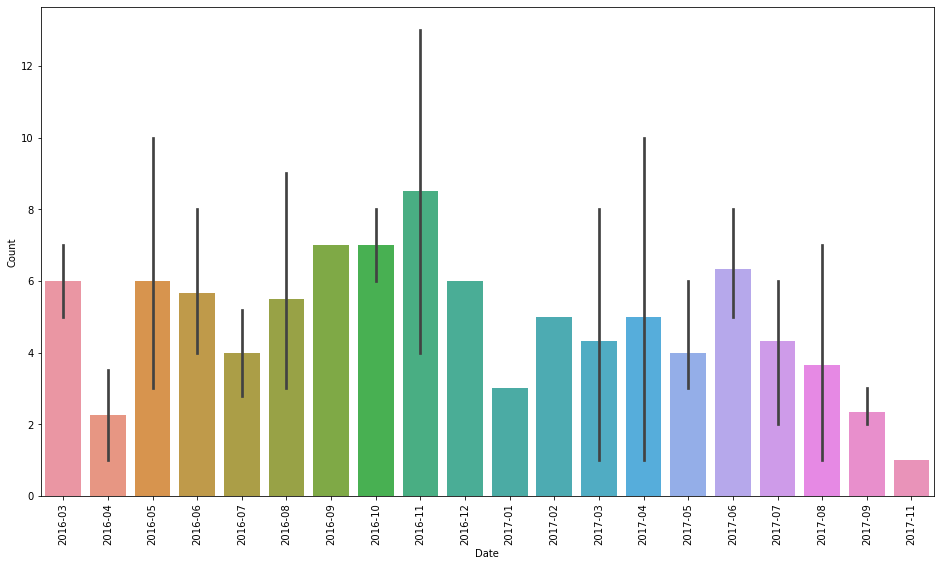

In [69]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_count['Date'], y = price_Ric_count['Count'])
plt.xticks(rotation = 90)

In [70]:
# There is a peak of sold properties from September to November every year in this suburb.

### 3.3 Seller agent analysis 

In [71]:
price_Ric_sel = price_Ric.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Jellis'),
  Text(1, 0, 'Biggin'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Blue'),
  Text(4, 0, 'Marshall'),
  Text(5, 0, 'Nelson'),
  Text(6, 0, 'Collins'),
  Text(7, 0, "Abercromby's"),
  Text(8, 0, 'Rendina'),
  Text(9, 0, 'Peter'),
  Text(10, 0, 'Kay'),
  Text(11, 0, 'RT'),
  Text(12, 0, 'Steveway'),
  Text(13, 0, 'Whiting'),
  Text(14, 0, 'Dingle'),
  Text(15, 0, 'Fletchers'),
  Text(16, 0, 'Woodards'),
  Text(17, 0, 'LITTLE'),
  Text(18, 0, 'Ray'),
  Text(19, 0, 'Domain'),
  Text(20, 0, 'McGrath'),
  Text(21, 0, 'Caine')])

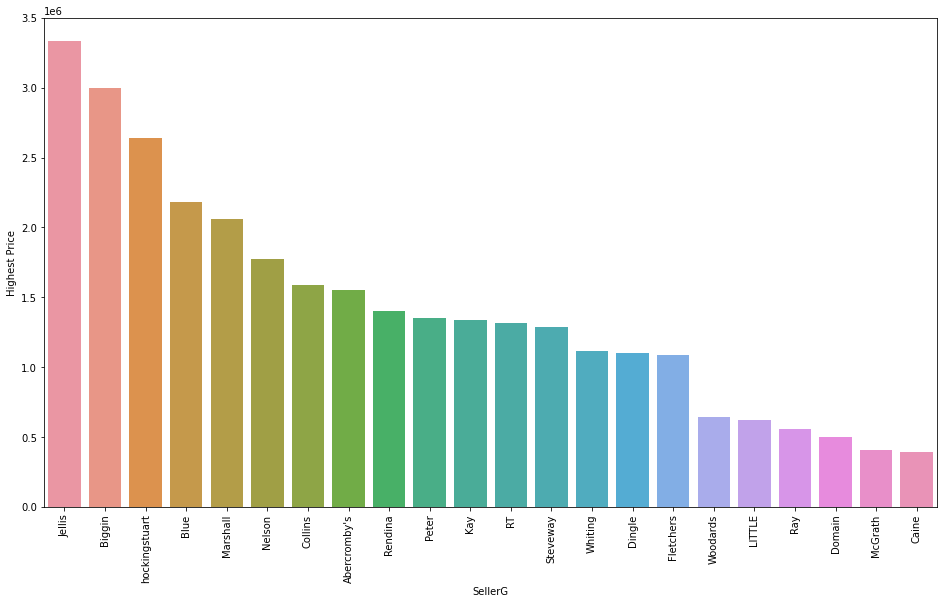

In [72]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_sel['SellerG'], y = price_Ric_sel['Highest Price'])
plt.xticks(rotation = 90)

In [73]:
price_Ric_sell = price_Ric.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Dingle'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'Biggin'),
  Text(3, 0, 'Marshall'),
  Text(4, 0, 'Ray'),
  Text(5, 0, 'Collins'),
  Text(6, 0, 'RT'),
  Text(7, 0, 'LITTLE'),
  Text(8, 0, 'Caine'),
  Text(9, 0, 'hockingstuart'),
  Text(10, 0, 'McGrath'),
  Text(11, 0, 'Domain'),
  Text(12, 0, 'Woodards'),
  Text(13, 0, 'Nelson'),
  Text(14, 0, 'Fletchers'),
  Text(15, 0, "Abercromby's"),
  Text(16, 0, 'Whiting'),
  Text(17, 0, 'Kay'),
  Text(18, 0, 'Steveway'),
  Text(19, 0, 'Peter'),
  Text(20, 0, 'Rendina'),
  Text(21, 0, 'Blue')])

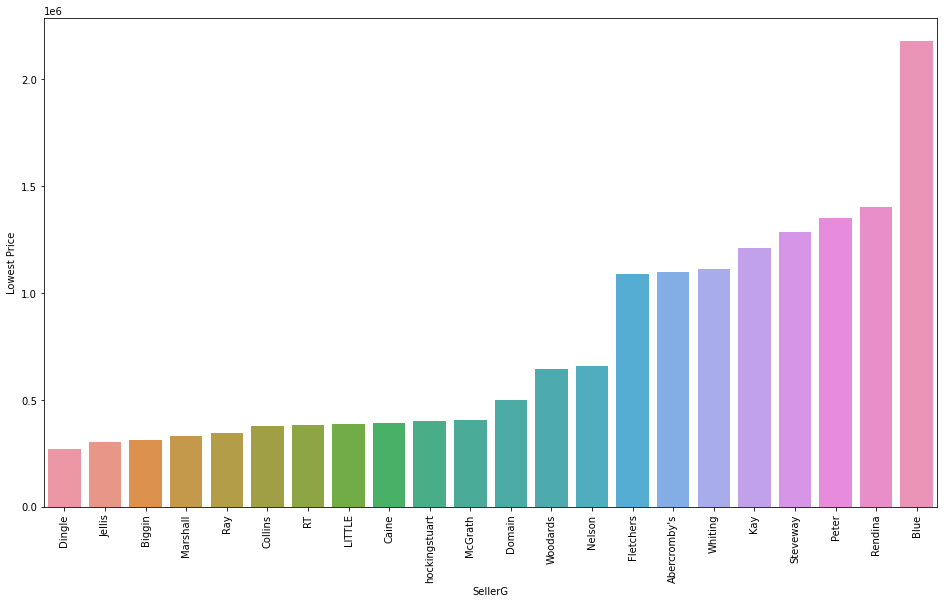

In [74]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_Ric_sell['SellerG'], y = price_Ric_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [75]:
price_Ric_selcount = price_Ric.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Biggin'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'hockingstuart'),
  Text(3, 0, 'Marshall'),
  Text(4, 0, 'Nelson'),
  Text(5, 0, 'Collins'),
  Text(6, 0, 'LITTLE'),
  Text(7, 0, 'Dingle'),
  Text(8, 0, 'RT'),
  Text(9, 0, 'Kay'),
  Text(10, 0, 'Ray'),
  Text(11, 0, "Abercromby's"),
  Text(12, 0, 'Domain'),
  Text(13, 0, 'Fletchers'),
  Text(14, 0, 'Caine'),
  Text(15, 0, 'Blue'),
  Text(16, 0, 'McGrath'),
  Text(17, 0, 'Peter'),
  Text(18, 0, 'Rendina'),
  Text(19, 0, 'Steveway'),
  Text(20, 0, 'Whiting'),
  Text(21, 0, 'Woodards')])

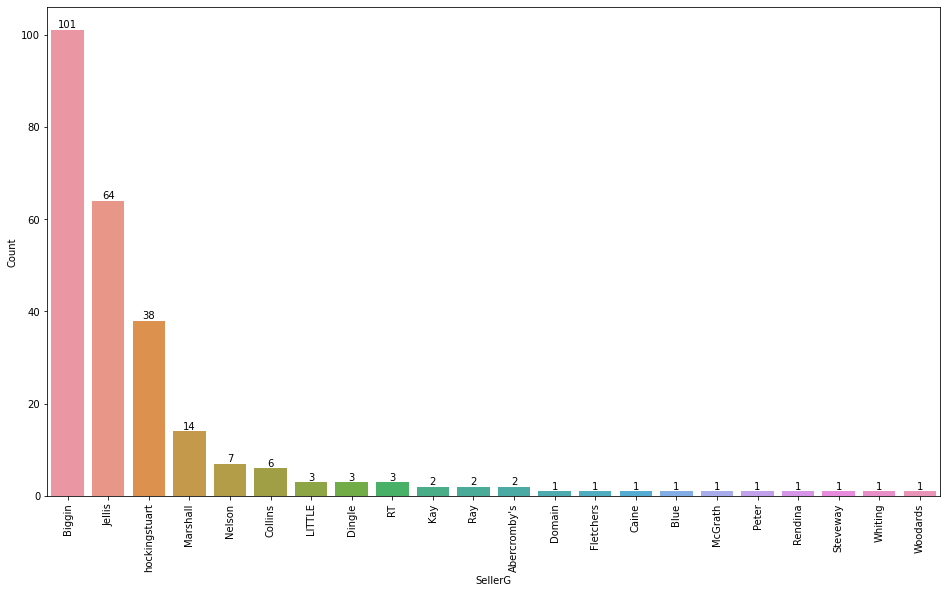

In [76]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_Ric_selcount['SellerG'], y = price_Ric_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

In [77]:
# Biggin is the most selected agent in the suburb with largest number of lising properties and the second highest selling price.

## 4. South Yarra

In [78]:
price_SY.isna().sum()/(price_SY.isna().sum() + price_SY.count())*100

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Bedroom2         0.000000
Bathroom         0.000000
Car              1.546392
Landsize         0.000000
BuildingArea    54.639175
YearBuilt       36.597938
CouncilArea      2.577320
Lattitude        0.000000
Longtitude       0.000000
Regionname       0.000000
dtype: float64

<AxesSubplot:>

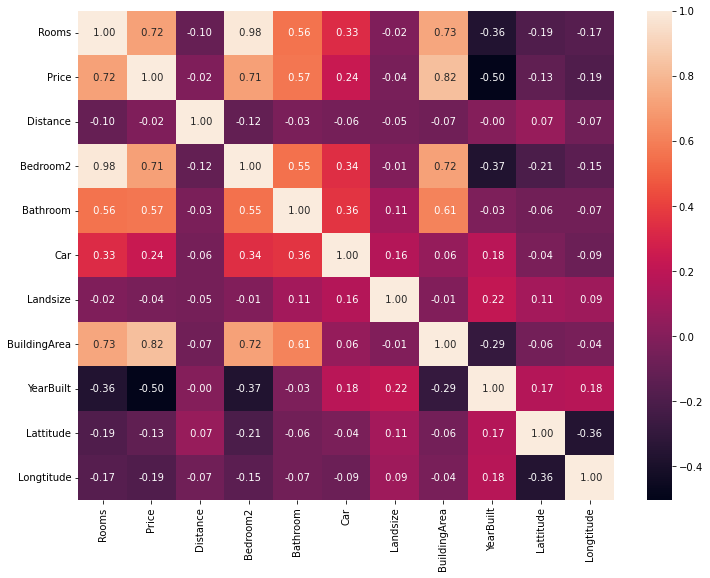

In [79]:
fig, axs = plt.subplots(figsize = (12,9))
sns.heatmap(price_SY.corr(), annot = True, fmt = ' .2f')

In [80]:
# In terms of the price, the buiding area has the highest correlation coefficient, following by Rooms and Bedroom2.
# It means the larger building area is, the higher the price will be, as they are positive related.
# However, the correlation coefficient between price and building area may not accurate, as there are 55% null value in building area column.

### 4.1 Median price trend

In [81]:
price_SY_median = price_SY.groupby(['Date'])['Price'].agg('median').reset_index(name = 'SYMedian')

(array([16892., 16983., 17075., 17167., 17257., 17348., 17440., 17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

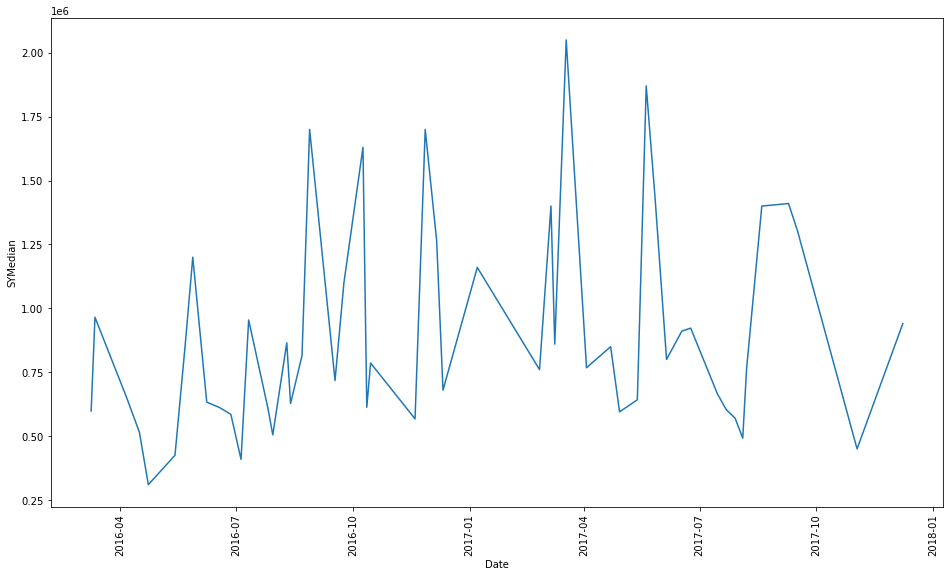

In [82]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(x = price_SY_median['Date'], y = price_SY_median['SYMedian'])
plt.xticks(rotation = 90)

In [83]:
price_SYm = pd.merge(price_median, price_SY_median, how = 'left', on = 'Date').set_index('Date')

(array([16801., 16892., 16983., 17075., 17167., 17257., 17348., 17440.,
        17532.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

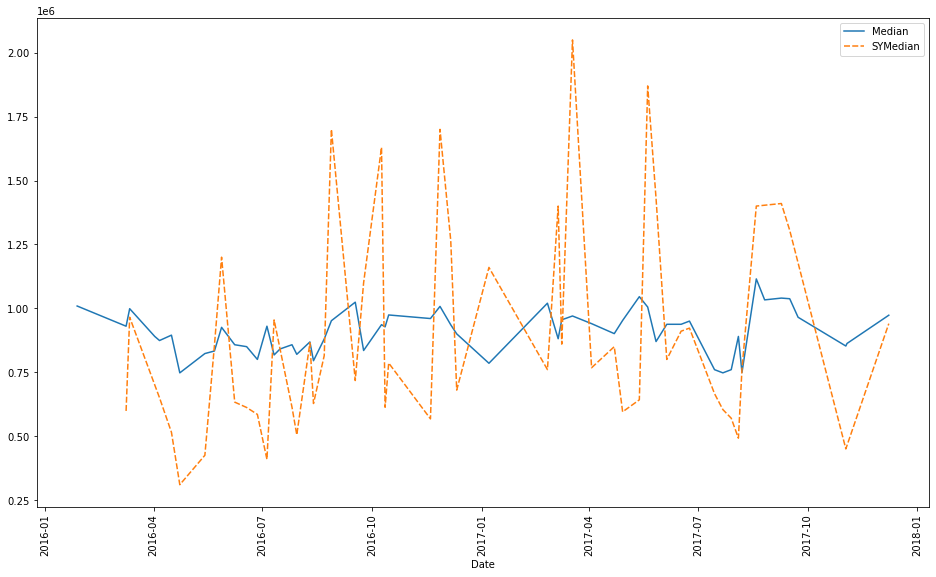

In [84]:
fig, axs = plt.subplots(figsize = (16,9))
sns.lineplot(data = price_SYm)
plt.xticks(rotation = 90)

In [85]:
# The property performance is not as stable as the whole market, there were properties with relative high price and relateive low price.
# It would be a risk if an investor wants to buy a property in this suburb.

### 4.2 Number of property sold during the period

In [86]:
price_SY_count = price_SY.groupby(['Date'])['Address'].count().reset_index(name = 'Count')
price_SY_count['Date'] = price_SY_count['Date'].dt.to_period('M')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '2016-03'),
  Text(1, 0, '2016-04'),
  Text(2, 0, '2016-05'),
  Text(3, 0, '2016-06'),
  Text(4, 0, '2016-07'),
  Text(5, 0, '2016-08'),
  Text(6, 0, '2016-09'),
  Text(7, 0, '2016-10'),
  Text(8, 0, '2016-11'),
  Text(9, 0, '2016-12'),
  Text(10, 0, '2017-01'),
  Text(11, 0, '2017-02'),
  Text(12, 0, '2017-03'),
  Text(13, 0, '2017-04'),
  Text(14, 0, '2017-05'),
  Text(15, 0, '2017-06'),
  Text(16, 0, '2017-07'),
  Text(17, 0, '2017-08'),
  Text(18, 0, '2017-09'),
  Text(19, 0, '2017-11'),
  Text(20, 0, '2017-12')])

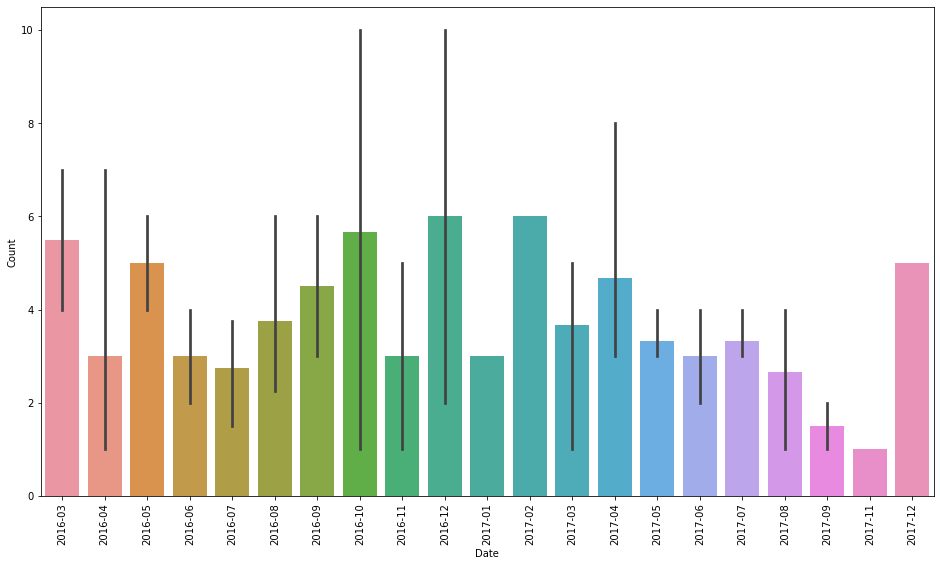

In [87]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_count['Date'], y = price_SY_count['Count'])
plt.xticks(rotation = 90)

In [88]:
# There is a peak of sold properties from October to December every year in this suburb.

### 4.3 Seller agent analysis

In [89]:
price_SY_sel = price_SY.groupby(['SellerG'])['Price'].max().reset_index(name = 'Highest Price').sort_values(by = ['Highest Price'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Castran'),
  Text(1, 0, 'Marshall'),
  Text(2, 0, 'RT'),
  Text(3, 0, 'Kay'),
  Text(4, 0, 'Williams'),
  Text(5, 0, 'Biggin'),
  Text(6, 0, 'Jellis'),
  Text(7, 0, 'hockingstuart'),
  Text(8, 0, "Abercromby's"),
  Text(9, 0, 'Greg'),
  Text(10, 0, 'Morrison'),
  Text(11, 0, 'Beller'),
  Text(12, 0, 'LITTLE'),
  Text(13, 0, 'Thomson'),
  Text(14, 0, 'Fletchers'),
  Text(15, 0, "Sotheby's"),
  Text(16, 0, 'Wilson'),
  Text(17, 0, 'Noel'),
  Text(18, 0, 'Ray'),
  Text(19, 0, 'Harrington'),
  Text(20, 0, 'Buxton'),
  Text(21, 0, 'Dingle'),
  Text(22, 0, 'McGrath'),
  Text(23, 0, 'Gary'),
  Text(24, 0, 'Hodges'),
  Text(25, 0, 'Owen')])

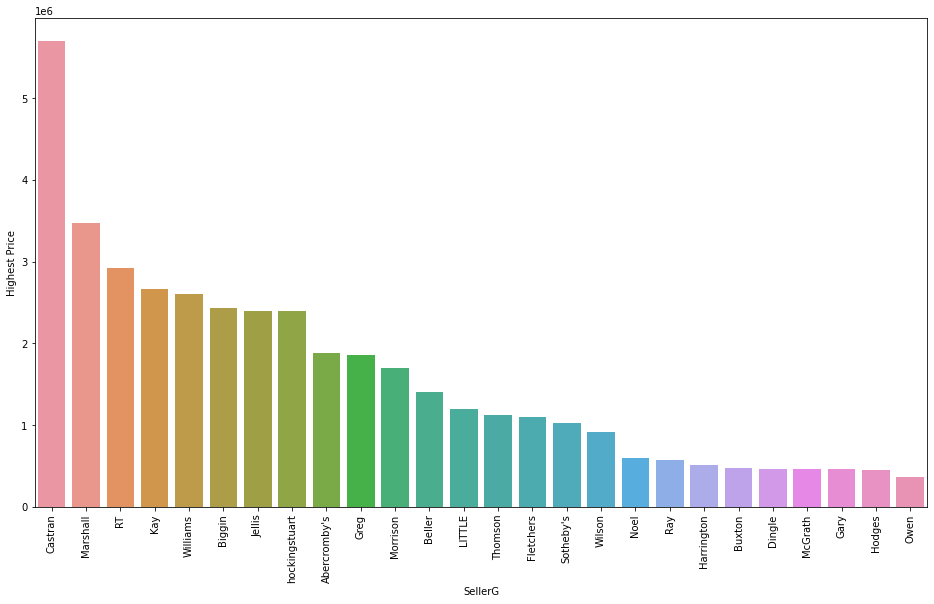

In [90]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_sel['SellerG'], y = price_SY_sel['Highest Price'])
plt.xticks(rotation = 90)

In [91]:
price_SY_sell = price_SY.groupby(['SellerG'])['Price'].min().reset_index(name = 'Lowest Price').sort_values(by = ['Lowest Price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Marshall'),
  Text(1, 0, 'hockingstuart'),
  Text(2, 0, 'Buxton'),
  Text(3, 0, 'Jellis'),
  Text(4, 0, 'Owen'),
  Text(5, 0, 'Hodges'),
  Text(6, 0, 'LITTLE'),
  Text(7, 0, 'Castran'),
  Text(8, 0, 'Biggin'),
  Text(9, 0, 'RT'),
  Text(10, 0, 'Gary'),
  Text(11, 0, 'McGrath'),
  Text(12, 0, 'Dingle'),
  Text(13, 0, 'Ray'),
  Text(14, 0, "Abercromby's"),
  Text(15, 0, 'Beller'),
  Text(16, 0, 'Harrington'),
  Text(17, 0, 'Williams'),
  Text(18, 0, 'Kay'),
  Text(19, 0, 'Noel'),
  Text(20, 0, 'Thomson'),
  Text(21, 0, 'Wilson'),
  Text(22, 0, "Sotheby's"),
  Text(23, 0, 'Fletchers'),
  Text(24, 0, 'Morrison'),
  Text(25, 0, 'Greg')])

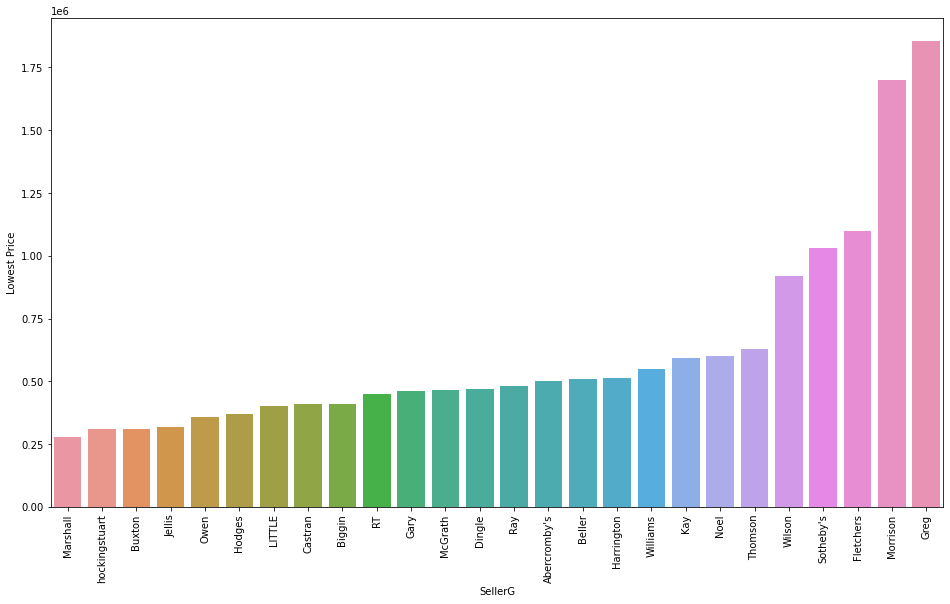

In [92]:
fig, axs = plt.subplots(figsize = (16,9))
sns.barplot(x = price_SY_sell['SellerG'], y = price_SY_sell['Lowest Price'])
plt.xticks(rotation = 90)

In [93]:
price_SY_selcount = price_SY.groupby(['SellerG'])['Address'].count().reset_index(name = 'Count').sort_values(by = ['Count'], ascending = False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'hockingstuart'),
  Text(1, 0, 'Jellis'),
  Text(2, 0, 'Williams'),
  Text(3, 0, 'Kay'),
  Text(4, 0, 'Marshall'),
  Text(5, 0, 'Biggin'),
  Text(6, 0, 'RT'),
  Text(7, 0, 'Castran'),
  Text(8, 0, 'Beller'),
  Text(9, 0, 'LITTLE'),
  Text(10, 0, "Abercromby's"),
  Text(11, 0, 'Hodges'),
  Text(12, 0, 'Ray'),
  Text(13, 0, 'Thomson'),
  Text(14, 0, 'Buxton'),
  Text(15, 0, 'Harrington'),
  Text(16, 0, 'Greg'),
  Text(17, 0, 'Gary'),
  Text(18, 0, 'Fletchers'),
  Text(19, 0, 'McGrath'),
  Text(20, 0, 'Morrison'),
  Text(21, 0, 'Noel'),
  Text(22, 0, 'Owen'),
  Text(23, 0, 'Dingle'),
  Text(24, 0, "Sotheby's"),
  Text(25, 0, 'Wilson')])

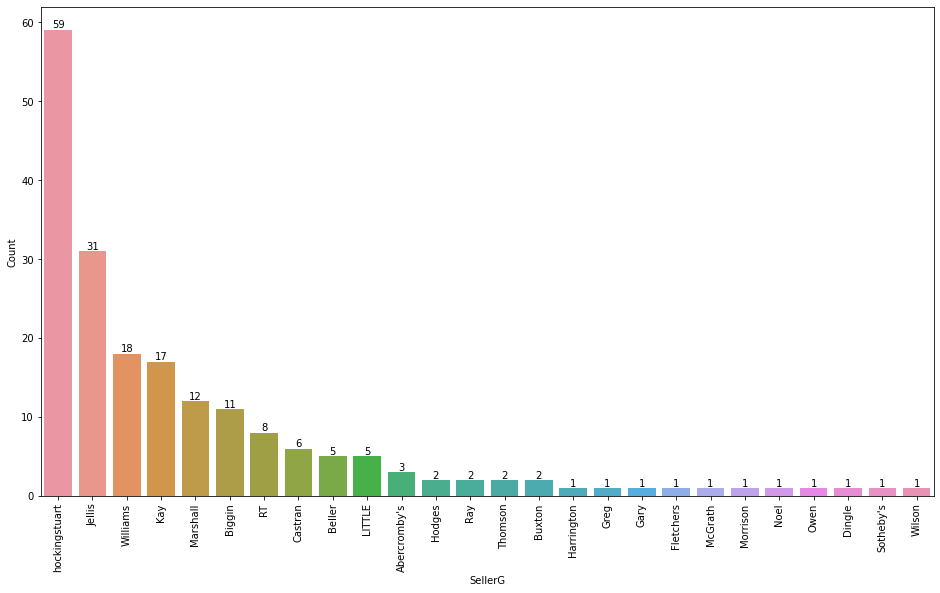

In [94]:
fig, axs = plt.subplots(figsize = (16,9))
ax = sns.barplot(x = price_SY_selcount['SellerG'], y = price_SY_selcount['Count'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

In [95]:
# Hockingstuart is the most selected agent, but Jellis had the similar performance as Hockingstuart.

# Forecast

In [96]:
# The main idea of the forecasting is to find out which parameters will impact the price and design a model to predict the trend of the property price.

In [97]:
x = price[['Suburb', 'Rooms', 'Date', 'Bedroom2']]
y = price['Price']

In [98]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y.values)

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [100]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 294020.0314628734
MSE: 208916985144.6443
RMSE: 457074.37594405166
R2 Square 0.46881033818379114
Train set evaluation:
_____________________________________
MAE: 134207.7751096887
MSE: 43860746803.2314
RMSE: 209429.57480554507
R2 Square 0.8940693628368948


In [102]:
evaluate_df_random_forest = pd.DataFrame(data=[["Random Forest Regression", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_random_forest

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Random Forest Regression,294020.031463,2.089170e+11,457074.375944,0.46881,"[0.41520635466213784, 0.4243041314368746, 0.40..."


### Gradient boost

In [103]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=13)

In [104]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 269906.1285313198
MSE: 179317145805.70844
RMSE: 423458.55264206015
R2 Square 0.5554450287321558
Train set evaluation:
_____________________________________
MAE: 241415.29703533632
MSE: 149387566437.945
RMSE: 386506.87760755955
R2 Square 0.6354238560402931


In [105]:
evaluate_df_gb = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(y_test, test_pred) , cross_val(GradientBoostingRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
evaluate_df_gb

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,GradientBoostingRegressor,269906.128531,1.793171e+11,423458.552642,0.555445,"[0.49461107738383103, 0.3478812281503646, 0.37..."


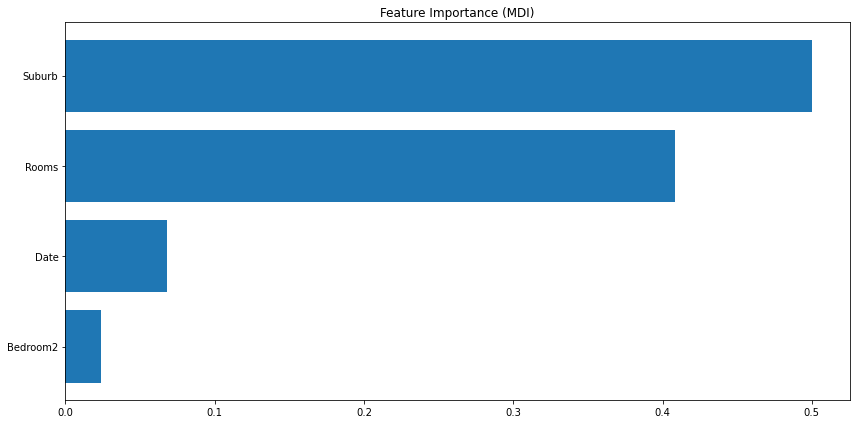

In [106]:
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

In [107]:
# Suburb and number of rooms are the two factors will have impact on the price.

### XGBoost

In [108]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

def print_evaluate(classifier, y_test, prediction):  
    scores_accuracy = cross_val_score(classifier, x, y, cv=10, scoring='accuracy')
    scores_f1 = cross_val_score(classifier, x, y, cv=10, scoring='f1_macro')
    print('K-fold cross-validation results:')
    print(classifier.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
    print(classifier.__class__.__name__+" average f1 is %2.3f" % scores_f1.mean())
    print('Classification report: ')
    print(classification_report(y_test, prediction))

In [109]:
#params = {'n_estimators': 500,
      #'learning_rate': 0.01,
      #'max_depth': 5,
      #'objective': 'multi:softprob',
      #'eval_metric': "auc"}

#xgb_model = xgb.XGBClassifier(**params)
#xgb_model.fit(X_train, y_train)
#xgb_model.fit(X_train, y_train, early_stopping_rounds=8, eval_set=[(X_test, y_test)])

#pred = xgb_model.predict(X_test)
#print_evaluate(xgb_model, y_test, pred)

# Conclusions

In [110]:
# 1. There is no obvious relationship between the price and other parameters in the whold market.
# 2. The median price of the whole market was fluctuated during Mar 2016 to Dec 2017, and the price of most of the properties were 0.5M to 1M.
#    The lower price was dragged by the large number of lower price unit.
# 3. Three different kinds of component suburbs are selected to analyse.
#    The price in every suburb has correlationship between different parameters.
#    The price patten varies between different suburbs and investors need to consider the patten before making any decisions.
#    Different suburbs have different selections of agent, it can be a guide for the sellers when they want to sell their properties.
#    October seems a good month to enter the market, as there was highest number of properties making deals in October.
# 4. Suburb and number of rooms have an impact on the price, however, date is not a material factor even though October is a good time to enter the market.
# Hence, the buyers need to consider the suburb and room number first to purchase the property if there is a strong need for the property.

# Note: The result is based on the data from Mar 2016 to Dec 2017 in Melbourne area, it needs more data to get the more accurate results.